the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


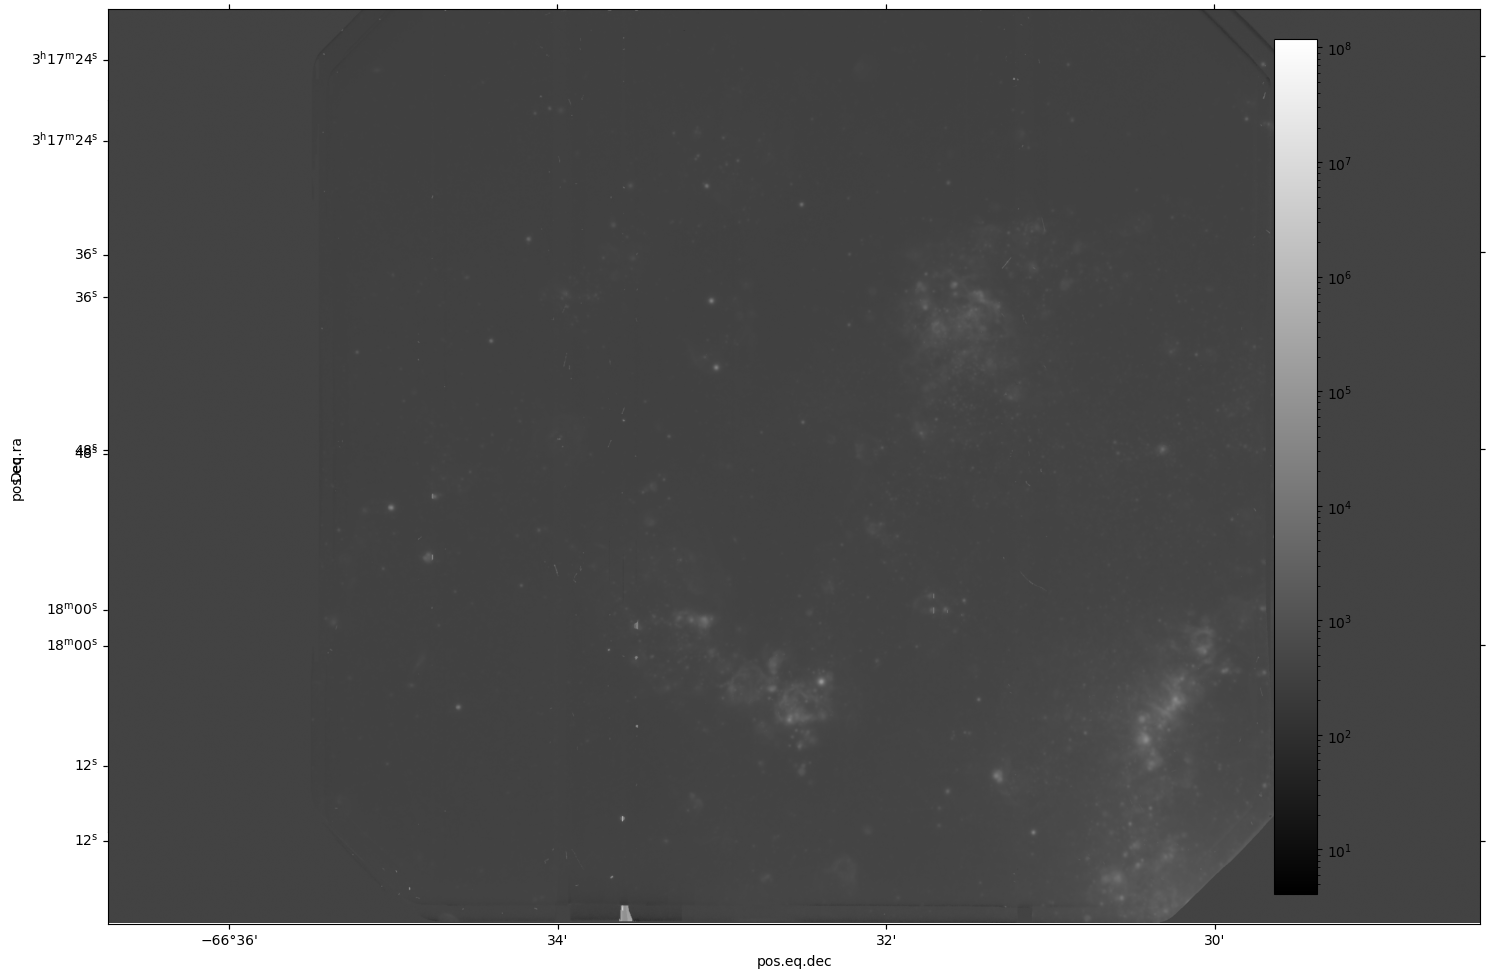

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from astropy.io import fits
fits_image_1 = fits.open('mrgS20190730S0157_add.fits')
image_1 = fits_image_1[1].data
header1 = fits_image_1[0].header
fits_image_2 = fits.open('mrgS20190730S0160_add.fits')
image_2 = fits_image_2[1].data
header2 = fits_image_2[0].header

# Supongamos que ya tienes image_1 como un array de numpy, por ejemplo:
# image_1 = np.random.random((2088, 3132))

# Crear el objeto WCS a partir del diccionario
from astropy.wcs import WCS
wcs_1_obj = WCS(header1)
wcs_2_obj = WCS(header2)
# Crear figura y eje con proyección WCS
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=wcs_2_obj)
ax2 = fig.add_subplot(1, 1, 1, projection=wcs_2_obj)    
# Mostrar la imagen
im0 = ax.imshow(image_2, cmap='gray', norm=LogNorm(), origin='lower')
im1 = ax2.imshow(image_2, cmap='gray', norm=LogNorm(), origin='lower')
# Barra de color
cbar = fig.colorbar(im0, ax=ax, orientation='vertical', shrink=0.6)

# Etiquetas
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

plt.tight_layout()
plt.show()

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, PercentileInterval, LogStretch



# ── Load data ────────────────────────────────────────────────────────────────
with fits.open('mrgS20190730S0157_add.fits') as h1:
    data1   = h1[1].data          # use the same extension for header & data
    header1 = h1[1].header

with fits.open('mrgS20190730S0160_add.fits') as h2:
    data2   = h2[1].data
    header2 = h2[1].header

wcs1, wcs2 = WCS(header1), WCS(header2)

# ── Normalisation (simple 99 % stretch + log) ───────────────────────────────
norm1 = ImageNormalize(data1, interval=PercentileInterval(99.), stretch=LogNorm())
norm2 = ImageNormalize(data2, interval=PercentileInterval(99.), stretch=LogNorm())

# ── Build figure ────────────────────────────────────────────────────────────
fig = plt.figure(figsize=(11, 5))

ax1 = fig.add_subplot(1, 2, 1, projection=wcs1)
im1 = ax1.imshow(data1, norm=norm1, cmap='gray', origin='lower')
ax1.set_xlabel('RA');  ax1.set_ylabel('Dec')
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

ax2 = fig.add_subplot(1, 2, 2, projection=wcs2)
im2 = ax2.imshow(data2, norm=norm2, cmap='gray', origin='lower')
ax2.set_xlabel('RA');  ax2.set_ylabel('Dec')
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

fig.suptitle('Adjacent MUSE pointings: S0157 (left) vs S0160 (right)', y=0.94)
fig.tight_layout()            # avoid label overlap
plt.show()


TypeError: stretch must be an instance of a BaseStretch subclass

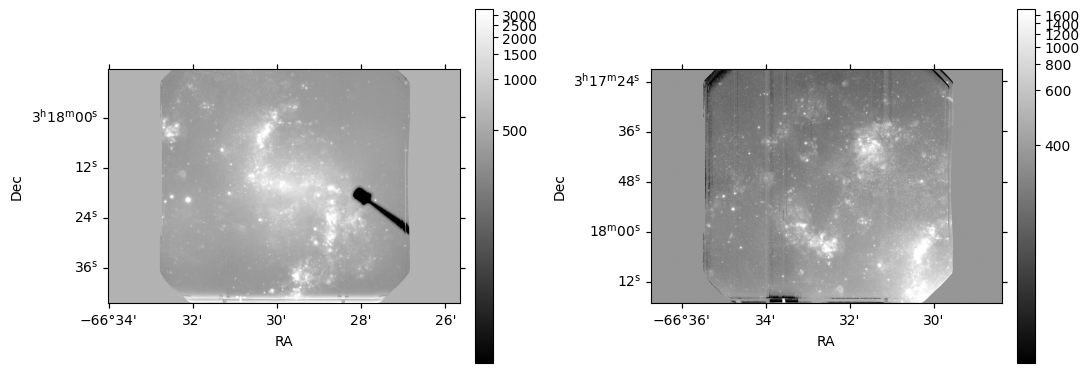

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, PercentileInterval, LogStretch

# ── Load data ─────────────────────────────────────────────
with fits.open('mrgS20190730S0157_add.fits') as h1:
    data1 = h1[1].data
    header1 = h1[1].header

with fits.open('mrgS20190730S0160_add.fits') as h2:
    data2 = h2[1].data
    header2 = h2[1].header

wcs1 = WCS(header1)
wcs2 = WCS(header2)

# ── Use LogStretch from astropy, NOT matplotlib ───────────
norm1 = ImageNormalize(data1, interval=PercentileInterval(99.),
                       stretch=LogStretch())

norm2 = ImageNormalize(data2, interval=PercentileInterval(99.),
                       stretch=LogStretch())

# ── Plot side by side ─────────────────────────────────────
fig = plt.figure(figsize=(11, 5))

ax1 = fig.add_subplot(1, 2, 1, projection=wcs1)
im1 = ax1.imshow(data1, cmap='gray', norm=norm1, origin='lower')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

ax2 = fig.add_subplot(1, 2, 2, projection=wcs2)
im2 = ax2.imshow(data2, cmap='gray', norm=norm2, origin='lower')
ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
